# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Imports and Config

In [151]:
# Импортируем необходимые библиотеки, задаём настройки
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)  # для воспроизводимости экспериментов

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [196]:
# Загрузим CSV, используем имеющуюся колонку индексов
df = pd.read_csv('data/Advertising.csv', index_col=0)

df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [198]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

- пропуски отсутствуют



**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [199]:
# numpy-arrays - это просто values у датафрейма

X = df.drop(['sales'], axis=1).values  # предикторы
y = df['sales'].values  # целевая переменная

In [200]:
X.shape, y.shape

((200, 3), (200,))

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [201]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [202]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [213]:
def coordinate_descent(X, y, n_iter=1000):
    '''
    Реализует алгоритм оптимизации - координатный спуск
    
    Аргументы:
                X (ndarray): матрица предикторов.
                y (ndarray): вектор весов.

    Возвращает:
                ndarray: вектор прогнозов.
    '''
    w = np.zeros(X.shape[1])  # нулевой вектор весов
    r = y  # начальное условие

    for _ in range(n_iter):  # делаем заданное число итераций
        for j in range(X.shape[1]):  # перебираем последовательно датапоинты
            r = y - X @ w
            r_j = r + X[:, j] * w[j]
            w[j] = X[:, j] @ r_j
            r = r - X[:, j] * w[j]
    return w

w = coordinate_descent(X, y, n_iter=1000)

print(f'Веса модели:')
print(w)

Веса модели:
[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [214]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [215]:
# Зададим предикторы (заново)
X = df.drop(['sales'], axis=1).values

# Проверим значения первых 10 рядов признаков
X[:10]

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2]])

In [216]:
# Отмасштабируем исходные предикторы X
# Вычитаем из каждого значения среднее (mean) и делим на стандартное отклонение (std)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Проверим значения первых 10 рядов признаков
X[:10]

array([[ 0.96985227,  0.98152247,  1.77894547],
       [-1.19737623,  1.08280781,  0.66957876],
       [-1.51615499,  1.52846331,  1.78354865],
       [ 0.05204968,  1.21785493,  1.28640506],
       [ 0.3941822 , -0.84161366,  1.28180188],
       [-1.61540845,  1.73103399,  2.04592999],
       [-1.04557682,  0.64390467, -0.32470841],
       [-0.31343659, -0.24740632, -0.87248699],
       [-1.61657614, -1.42906863, -1.36042422],
       [ 0.61604287, -1.39530685, -0.43058158]])

**Добавим единичный столбец**

In [217]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [218]:
def mse_error(y_true, y_pred):
    '''
    Вычисляет среднеквадратичую ошибку.
    
    Аргументы:
                y_true (ndarray):  реальные значения.
                y_pred (ndarray):  предсказываемые значения.
    Возвращает:
                ndarray: значение среднеквадратичной ошибки.
    '''
    return np.mean((y_true - y_pred)**2)  # ищем среднее квадрата разницы

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [194]:
[np.mean(y)] * len(y)
np.full(len(y), np.mean(y))

array([1.])

In [219]:
# Делаем y_pred по среднему значению
# y_pred = np.full(len(y), np.mean(y))
y_pred = np.mean(y)

# Вычисляем MSE
mse_error(y, y_pred)
print(f'Наивный прогноз (y_pred = np.mean(y): {y_pred})')
print(f'MSE: {mse_error(y, y_pred)}')

Наивный прогноз (y_pred = np.mean(y): 14.0225)
MSE: 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [220]:
def lin_pred(X, w):
    '''
    Рассчитывает вектор прогнозов по матрице предикторов (X) и вектору весов (w) линейной модели.
    
    Аргументы:
                X (ndarray): матрица предикторов.
                w (ndarray): вектор весов.

    Возвращает:
                ndarray: вектор прогнозов.
    '''
    return X @ w  # умножаем матрицу на вектор весов

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [221]:
def stoch_grad_step(X, y, w, train_ind, eta):
    '''
    Выполняет один шаг стохастического градиентного спуска.

    Аргументы:
                X (ndarray): массив предикторов размерностью (M, N).
                y (ndarray): массив целевой переменной размерностью M.
                w (ndarray): вектор весов размерностью N.
                train_ind (int): индекс объекта обучающей выборки, по которому считается изменение весов.
                eta (float): шаг градиентного спуска.

    Возвращает:
                ndarray: вектор обновленных весов размерностью N.
    '''
    # Находим предсказания
    y_pred = lin_pred(X[train_ind], w)    
    # Ищем направление изменения (градиент)
    grad = 2 * X[train_ind] * (y_pred - y[train_ind]) / len(y)
    # Возвращаем обновляем веса, используя шаг градиентного спуска
    return w - grad * eta

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [222]:
def stochastic_gradient_descent(X, y, w, eta, max_iter, tol):
    '''
    Функция реализации стохастического градиентного спуска.
    Аргументы:
                X (ndarray): матрица признаков размерностью (M, N).
                y (ndarray): вектор целевой переменной размерностью M.
                w (ndarray): вектор весов размерностью N.
                eta (float): шаг градиентного спуска.
                max_iter (int): максимальное число итераций.
                tol (float): критерий останова (мин. евкл. расстояние между векторами весов)
    Возвращает:
                ndarray, list: вектор весов размерностью N и список ошибок.
    '''
    dist = np.inf  # расстояние между векторами весов на соседних итерациях
    mse_list = []  # список ошибок
    i = 0          # счетчик итераций

    # Основной цикл обучения
    while dist > tol and i < max_iter:  # итерируем, пока не застряли
        y_pred = lin_pred(X, w)  # находим предикты
        mse = mse_error(y, y_pred)  # ищем ошибку MSE
        mse_list.append(mse)  # сохраняем в список ошибок
        
        train_ind = np.random.randint(len(y))  # берём датапоинт случайного индекса
        w_i = stoch_grad_step(X, y, w, train_ind, eta)  # считаем текущий шаг стох. спуска
        dist = np.linalg.norm(w_i - w)  # находим текущее расстояние между весами
        w = w_i  # обновляем веса
        
        i += 1  # увеличиваем счётчик итераций

    return w, mse_list

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [238]:
# Задаём гиперпараметры
w = np.zeros(X.shape[1])  # нулевые стартовые веса
eta = 0.01                # темп обучения (learning rate)
max_iter = 10**5          # максимальное число итераций
tol = 1e-8                # -3 -8 критерий останова (мин. расстояние между векторами весов)

# Запускаем стох. градиентный спуск
w_, mse_list = stochastic_gradient_descent(X, y, w, eta, max_iter, tol)

In [239]:
w_

array([13.95369038,  3.89555539,  2.76965491,  0.02335961])

**Постройте график зависимости ошибки от номера итерации**

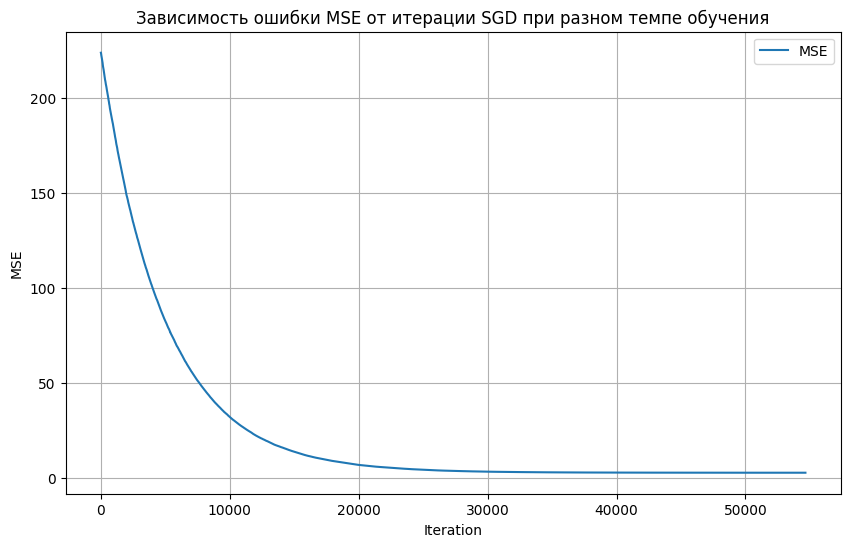

In [244]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(mse_list)), mse_list, label='MSE')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Зависимость ошибки MSE от итерации SGD при разном темпе обучения')
plt.grid()
plt.legend()
plt.show()

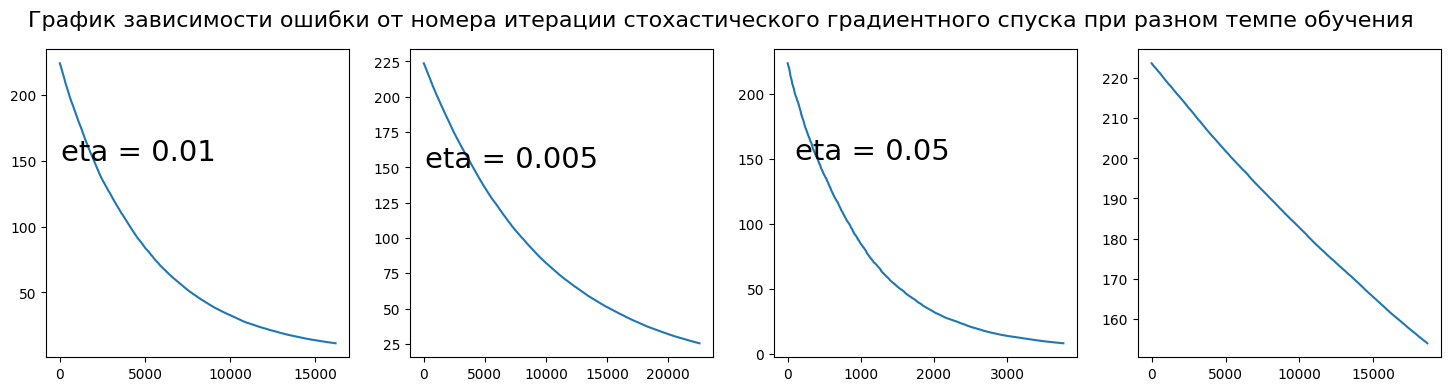

In [226]:
# ВИЗУАЛИЗАЦИЯ
fig, axx = plt.subplots(1, 4,  figsize=(18, 4))

fig.suptitle('График ', fontsize=16)
axx[0].plot(list(range(len(mse_list))), mse_list)
axx[0].annotate(f'eta = {eta}', (50, 150), fontsize=21)


w = np.zeros(X.shape[1])
eta = 0.005               # темп обучения
w_1, mse_list_1 = stochastic_gradient_descent(X, y, w, eta, max_iter, tol)
axx[1].plot(list(range(len(mse_list_1))), mse_list_1)
axx[1].annotate(f'eta = {eta}', (100, 150), fontsize=21)


w = np.zeros(X.shape[1])
eta = 0.05               # темп обучения
w_1, mse_list_1 = stochastic_gradient_descent(X, y, w, eta, max_iter, tol)
axx[2].plot(list(range(len(mse_list_1))), mse_list_1)
axx[2].annotate(f'eta = {eta}', (100, 150), fontsize=21)


w = np.zeros(X.shape[1])
eta = 0.001               # темп обучения
w_1, mse_list_1 = stochastic_gradient_descent(X, y, w, eta, max_iter, tol)
axx[3].plot(list(range(len(mse_list_1))), mse_list_1)
axx[3].annotate(f'eta = {eta}', (100, 150), fontsize=21)

# plt.tight_layout()
plt.show();

**Выведите вектор весов, к которому сошелся метод.**

In [241]:
print('Вектор весов:')
print(w_)

Вектор весов:
[13.95369038  3.89555539  2.76965491  0.02335961]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [242]:
# MSE на последней итерации
print('MSE на последней итерации:')
print(mse_list[-1])

MSE на последней итерации:
2.7912380429997974
